In [19]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#data=pd.read_csv("C:\\Users\\Utsav\\Desktop\\Mxene\\ML_exp", sep=',',header=0)

url = "https://raw.githubusercontent.com/UtsavMurarka/MXene-machine-learning/master/anant_data_miner/post_midsem_work/data_physical.csv"

data=pd.read_csv(url, sep=',',header=0)
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,bandgap,nn1,nn2,nn3,nn4,nn5,np1,np2,np3,np4,np5,...,en2,en3,en4,en5,ie1,ie2,ie3,ie4,ie5,d1,d2,d3,d4,d5,mp1,mp2,mp3,mp4,mp5,bp1,bp2,bp3,bp4,bp5,numiso1,numiso2,numiso3,numiso4,numiso5,shell1,shell2,shell3,shell4,shell5,spheat1,spheat2,spheat3,spheat4,spheat5,label
0,3.26,0.0,0.0,-1.63,2.82,0.0,0.000000e+00,1.000000e-16,32.8,0.333,0.667,0.383,0.667,0.333,0.220,0.000,0.000,0.301,0.333,0.667,0.275,0.667,0.333,0.328,24.0,24.0,6.0,35.0,35.0,0.0,28,28,6,45,45,24,24,6,35,35,...,1.66,2.55,2.96,2.96,6.7665,6.7665,11.2603,11.8138,11.8138,7.15,7.15,2.27,3.12000,3.12000,2130.15,2130.15,3948.15,266.05,266.050,2944,2944,4300.0,332.00,332.00,9,9,7,19,19,4,4,2,4,4,0.449,0.449,0.709,0.474,0.474,0
1,3.13,0.0,0.0,-1.56,2.71,0.0,0.000000e+00,-2.000000e-16,35.6,0.333,0.667,0.374,0.000,0.000,0.296,0.333,0.667,0.270,0.667,0.333,0.322,0.667,0.333,0.244,24.0,24.0,6.0,35.0,1.0,0.0,28,28,6,45,0,24,24,6,35,1,...,1.66,2.55,2.96,2.20,6.7665,6.7665,11.2603,11.8138,13.5984,7.15,7.15,2.27,3.12000,0.00009,2130.15,2130.15,3948.15,266.05,14.175,2944,2944,4300.0,332.00,20.28,9,9,7,19,3,4,4,2,4,1,0.449,0.449,0.709,0.474,14.304,0
2,3.24,0.0,0.0,-1.62,2.81,0.0,1.000000e-16,-2.000000e-16,33.1,0.667,0.333,0.220,0.000,0.000,0.302,0.333,0.667,0.379,0.333,0.667,0.274,0.667,0.333,0.330,24.0,24.0,6.0,17.0,35.0,0.0,28,28,6,18,45,24,24,6,17,35,...,1.66,2.55,3.16,2.96,6.7665,6.7665,11.2603,12.9676,11.8138,7.15,7.15,2.27,0.00321,3.12000,2130.15,2130.15,3948.15,172.31,266.050,2944,2944,4300.0,239.11,332.00,9,9,7,11,19,4,4,2,3,4,0.449,0.449,0.709,0.479,0.474,0
3,3.18,0.0,0.0,-1.59,2.75,0.0,0.000000e+00,-1.000000e-16,34.6,0.000,0.000,0.301,0.333,0.667,0.376,0.667,0.333,0.226,0.333,0.667,0.274,0.667,0.333,0.328,24.0,24.0,6.0,17.0,17.0,0.0,28,28,6,18,18,24,24,6,17,17,...,1.66,2.55,3.16,3.16,6.7665,6.7665,11.2603,12.9676,12.9676,7.15,7.15,2.27,0.00321,0.00321,2130.15,2130.15,3948.15,172.31,172.310,2944,2944,4300.0,239.11,239.11,9,9,7,11,11,4,4,2,3,3,0.449,0.449,0.709,0.479,0.479,0
4,3.10,0.0,0.0,-1.55,2.68,0.0,0.000000e+00,2.000000e-16,36.4,0.000,0.000,0.297,0.333,0.667,0.369,0.333,0.667,0.270,0.667,0.333,0.323,0.667,0.333,0.245,24.0,24.0,6.0,17.0,1.0,0.0,28,28,6,18,0,24,24,6,17,1,...,1.66,2.55,3.16,2.20,6.7665,6.7665,11.2603,12.9676,13.5984,7.15,7.15,2.27,0.00321,0.00009,2130.15,2130.15,3948.15,172.31,14.175,2944,2944,4300.0,239.11,20.28,9,9,7,11,3,4,4,2,3,1,0.449,0.449,0.709,0.479,14.304,0


In [20]:
#drop band gap column
data = data.drop('bandgap', axis=1)
print(np.shape(data))

(3079, 100)


In [21]:
mxene=data.values
mxene=np.array(mxene)
#split the data

train, test = train_test_split(data, test_size=0.2)
train=np.array(train)
test=np.array(test)
NegativeCount=0
PositiveCount=0
for i in range(len(train)):
    if train[i][99]==0 :
        NegativeCount=NegativeCount+1
    if train[i][99]==1:
        PositiveCount=PositiveCount+1
print(NegativeCount)
print(PositiveCount)
print(PositiveCount+NegativeCount)
positives=np.zeros((PositiveCount,100))
negatives=np.zeros((NegativeCount,100))
    
j=0
k=0
    
for i in range(len(train)):

    if(train[i,99] == 1):
        positives[j,:] = train[i,:]
        j=j+1
    if(train[i,99] == 0):
        negatives[k,:] = train[i,:]
        k=k+1

print(np.shape(train))
print(np.shape(test))

2137
326
2463
(2463, 100)
(616, 100)


In [22]:
y_train=np.zeros(len(train))
y_test=np.zeros(len(test))

for i in range(len(test)):
    y_test[i]=test[i][99]
    test[i][99]=1

for i in range(len(train)):
    y_train[i]=train[i][99]
    train[i][99]=1

train = np.delete(train, 99, 1)
test = np.delete(test, 99, 1)

train = np.delete(train, 98, 1)
test = np.delete(test, 98, 1)

print(np.shape(train))
print(np.shape(test))

(2463, 98)
(616, 98)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


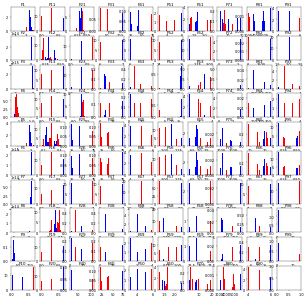

In [24]:
fig, axs = plt.subplots(10, 10)
plt.rcParams['figure.figsize'] = [50,50]
plt.rcParams['figure.dpi'] = 100
bins=20
i=0
j=0
for ind in range(99):
  x=[positives[:,ind], negatives[:,ind]]
  clr=['r', 'b']
  lbl=['Non-metals', 'Metals']
  axs[i,j].hist(x, bins, density=True, color=clr, label=lbl)
  axs[i, j].set_title("F" + str(ind+1))
  i = (i+1)%10
  if (i%10==0):
    j = (j+1)%10

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [0]:
clf_list = [GaussianNB(), LogisticRegression(max_iter=999999999), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),  SVC(probability=True) ]

Accuracy = 48.05194805194805%


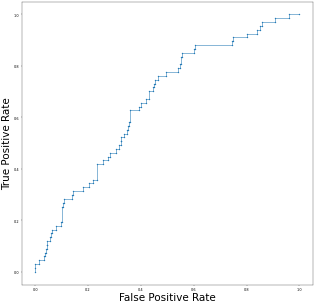

0.6625615093929261
[[239 310]
 [ 10  57]]
Accuracy = 87.17532467532467%


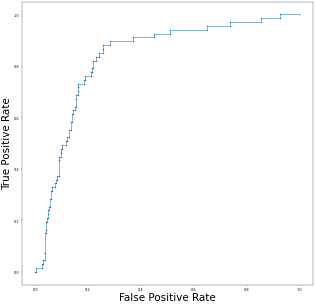

0.832776010657097
[[523  26]
 [ 53  14]]
Accuracy = 88.14935064935064%


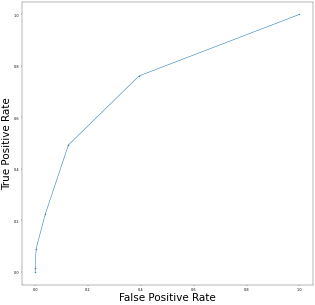

0.7389147160372997
[[528  21]
 [ 52  15]]
Accuracy = 90.09740259740259%


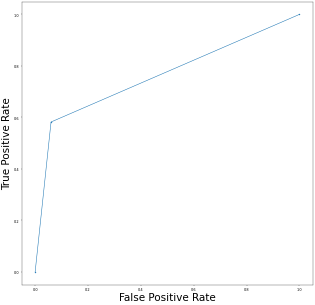

0.76099013131066
[[516  33]
 [ 28  39]]
Accuracy = 93.34415584415584%


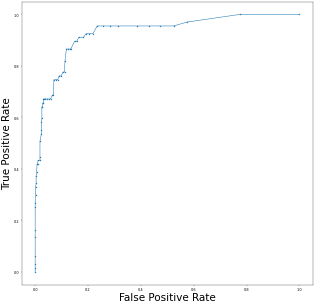

0.931245412282848
[[536  13]
 [ 28  39]]
Accuracy = 88.47402597402598%


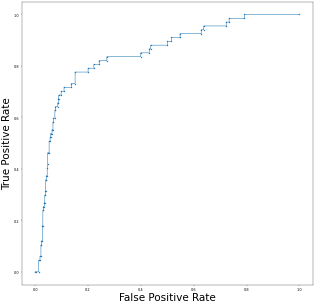

0.8492374194600767
[[542   7]
 [ 64   3]]


In [28]:
plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train_scaled, y_train)
  y_pred = clf.predict(test_scaled)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test_scaled)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))

## Dimensionality Reduction

Accuracy = 84.0909090909091%


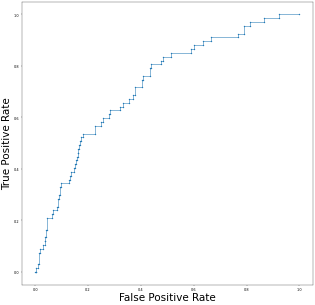

0.7272653127803606
[[495  54]
 [ 44  23]]
Accuracy = 87.17532467532467%


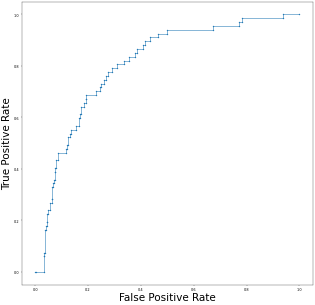

0.8063235733898811
[[524  25]
 [ 54  13]]
Accuracy = 87.98701298701299%


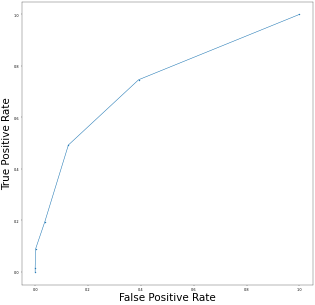

0.7315607753581816
[[529  20]
 [ 54  13]]
Accuracy = 83.11688311688312%


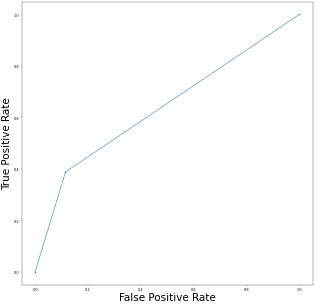

0.6366528015659408
[[486  63]
 [ 41  26]]
Accuracy = 89.44805194805194%


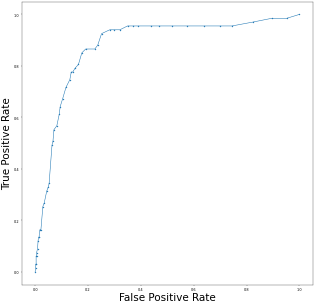

0.8791833183807738
[[547   2]
 [ 63   4]]
Accuracy = 88.47402597402598%


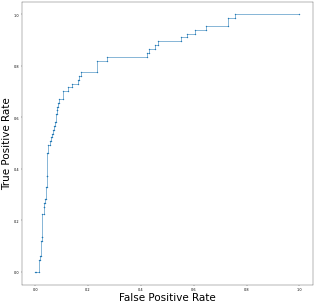

0.8461245684147568
[[542   7]
 [ 64   3]]


In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
train_reduced = pca.fit_transform(train_scaled)
test_reduced = pca.transform(test_scaled)

plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train_reduced, y_train)
  y_pred = clf.predict(test_reduced)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test_reduced)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))

Accuracy = 73.86363636363636%


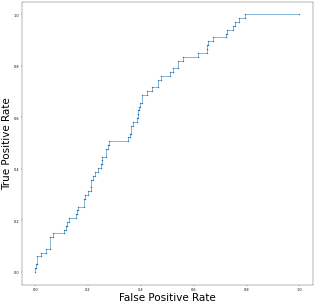

0.6645733083217791
[[433 116]
 [ 45  22]]
Accuracy = 87.98701298701299%


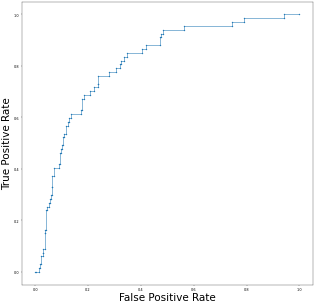

0.8145610744093739
[[526  23]
 [ 51  16]]
Accuracy = 93.5064935064935%


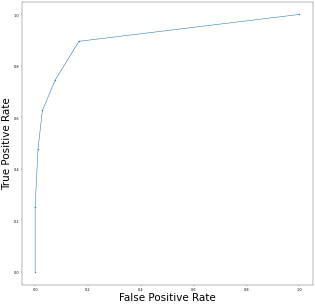

0.9107468123861566
[[534  15]
 [ 25  42]]
Accuracy = 86.68831168831169%


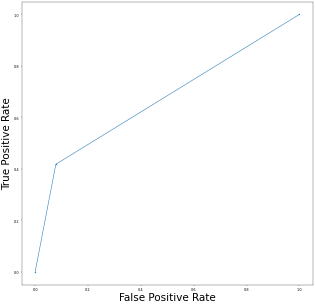

0.6697931109479922
[[506  43]
 [ 39  28]]
Accuracy = 92.85714285714286%


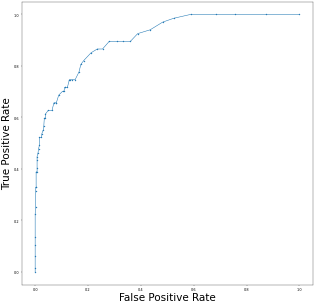

0.9067775874724737
[[545   4]
 [ 40  27]]
Accuracy = 89.28571428571429%


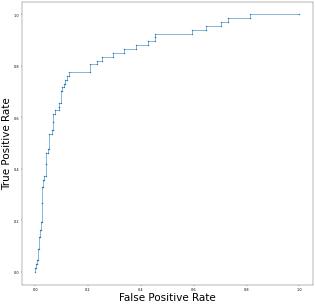

0.8628714351738574
[[537  12]
 [ 54  13]]


In [34]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
nca = NCA(n_components=35)
train_reduced = nca.fit_transform(train_scaled, y_train)
test_reduced = nca.transform(test_scaled)

plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['figure.dpi'] = 25
for clf in clf_list:
  clf.fit(train_reduced, y_train)
  y_pred = clf.predict(test_reduced)
  print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")
  proba = clf.predict_proba(test_reduced)
  proba = proba[:,1]
  lr_fpr, lr_tpr, _ = roc_curve(y_test, proba)
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate', size = 30)
  plt.ylabel('True Positive Rate', size = 30)
  plt.show()
  print(roc_auc_score(y_test, proba))
  print(confusion_matrix(y_test, y_pred))

# **Data Visualisation using PCA**

In [0]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(train_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [58]:
targetDf = pd.DataFrame({'y':y_train})
targetDf.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [59]:
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,3.285772,0.406783,-2.746854
1,4.567763,-2.823447,-4.124592
2,-6.317247,4.396991,-2.525912
3,4.059493,-3.044528,-3.241225
4,4.329513,0.297681,2.942533


In [60]:
finalDf = pd.concat([principalDf, targetDf[['y']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,y
0,3.285772,0.406783,-2.746854,0.0
1,4.567763,-2.823447,-4.124592,0.0
2,-6.317247,4.396991,-2.525912,0.0
3,4.059493,-3.044528,-3.241225,0.0
4,4.329513,0.297681,2.942533,0.0


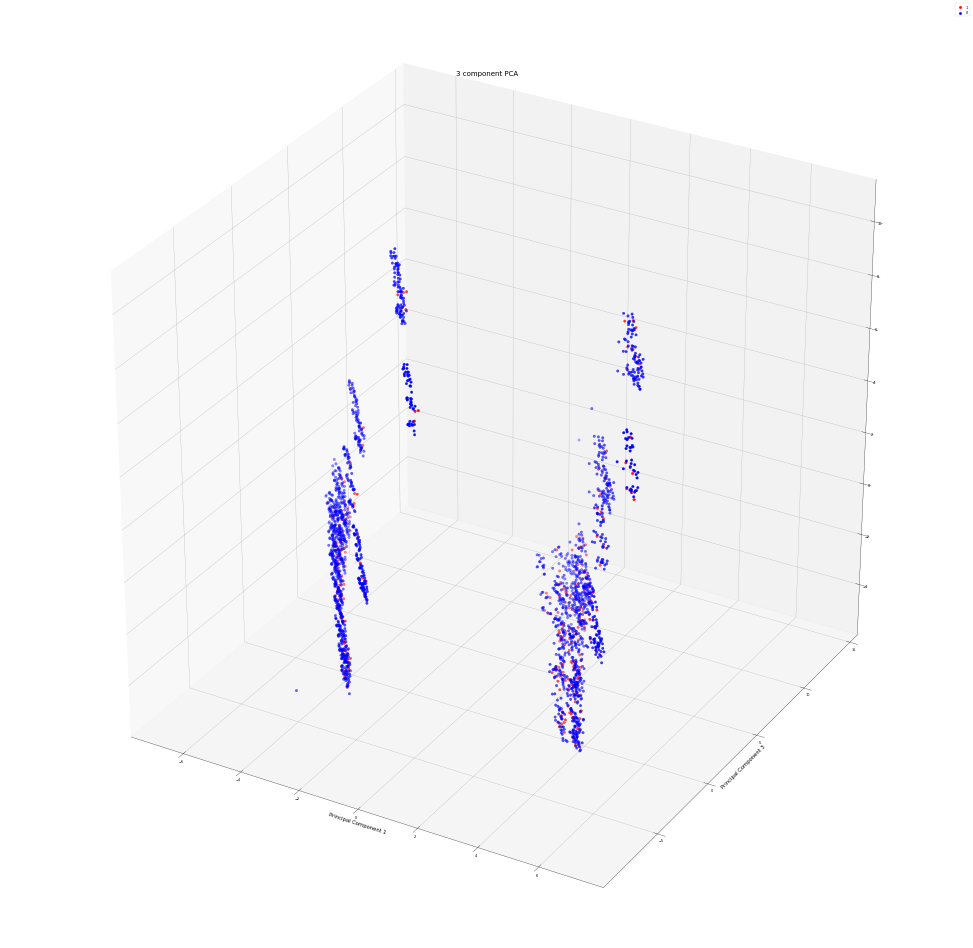

In [61]:
fig = plt.figure(figsize = (50,50))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['y'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],finalDf.loc[indicesToKeep, 'principal component 2'],finalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()